In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Ablation/edo.edo2')

In [3]:
df['perc_triples'] = ((df['n_triples_min'] - df['n_triples_original']) / df['n_triples_original']).abs()
df['perc_entities'] = ((df['n_entity_abl'] - df['n_entity_baseline']) / df['n_entity_baseline']).abs()

In [4]:
color = {.2: 'blue', .25: 'green',.3: 'violet',.35: 'orange',.4: 'red', .45: 'brown',.5: 'black'}

In [21]:
def show_stuff(local_df):
    ticks_names = []
    ticks_values = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.set_title('Entities')
    ax2.set_title('Triples')
    
    for index, (name, sub_df) in enumerate(local_df.groupby('dataset')):
        ticks_values.append(index)
        ticks_names.append(name)
        for name, sub_sub_df in sub_df.groupby('max_bottom'):
            value_ax2 = sub_sub_df['perc_triples'].values[0]
            value_ax1 = sub_sub_df['perc_entities'].values[0]
            if index == 0:
                l = name
            else:
                l = None
            ax2.scatter(index, value_ax2, c=color[name], label=l)
            ax1.scatter(index, value_ax1, c=color[name], label=l)
            
    
    ax1.set_xticks(ticks_values, ticks_names)
    ax2.set_xticks(ticks_values, ticks_names)

    ax1.set_ylim([0, 1])
    ax2.set_ylim([0, 1])

    ax1.set_xlabel('Dataset')
    ax2.set_xlabel('Dataset')

    ax1.set_ylabel('Percentage of deleted')
    ax2.set_ylabel('Percentage of deleted')
    
    plt.legend()
    plt.savefig('/Users/edoardo/Downloads/ablation.pdf')
#plt.show()

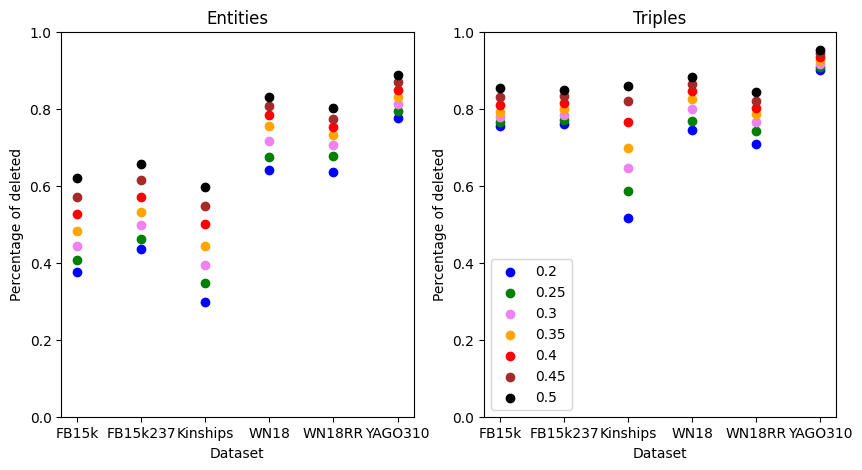

In [22]:
show_stuff(df[(df['max_top'] == 0.1) & (df['property'] == 'pagerank')])

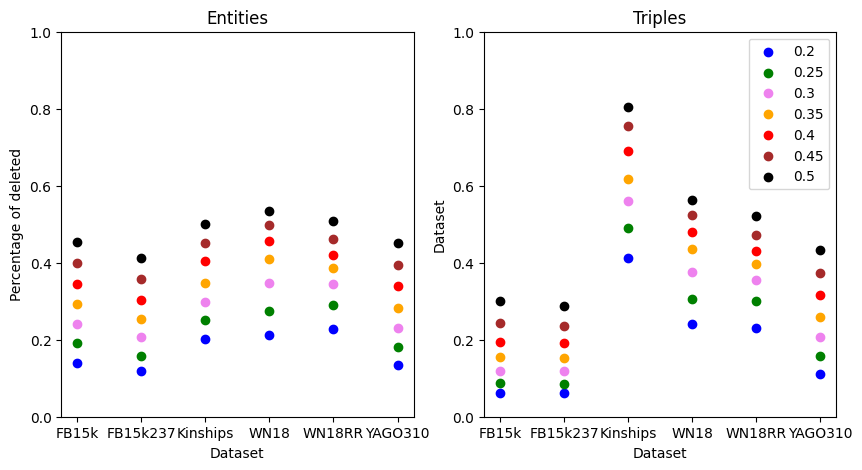

In [12]:
show_stuff(df[(df['max_top'] == 0.0) & (df['property'] == 'pagerank')])